# 1. Notebook Dependencies

In [25]:
import xlrd
import requests
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, ConfusionMatrixDisplay
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.svm import l1_min_c

pd.set_option('display.max_columns', None)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [26]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls'

df = pd.read_excel(url, header = 1, index_col=0)

df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [27]:
# observe data dimensions and types
print('df shape: ', df.shape, 'df data types:', df.dtypes, sep = '\n')

df shape: 
(30000, 24)
df data types:
LIMIT_BAL                     int64
SEX                           int64
EDUCATION                     int64
MARRIAGE                      int64
AGE                           int64
PAY_0                         int64
PAY_2                         int64
PAY_3                         int64
PAY_4                         int64
PAY_5                         int64
PAY_6                         int64
BILL_AMT1                     int64
BILL_AMT2                     int64
BILL_AMT3                     int64
BILL_AMT4                     int64
BILL_AMT5                     int64
BILL_AMT6                     int64
PAY_AMT1                      int64
PAY_AMT2                      int64
PAY_AMT3                      int64
PAY_AMT4                      int64
PAY_AMT5                      int64
PAY_AMT6                      int64
default payment next month    int64
dtype: object


# 2. Exploratory Data Analysis

### To-do:
1. Check for any null or NaN values.
2. Observe distributions of variables using histograms and boxplots.
3. Consider if any binning or encoding of categorical variables should be performed.
4. Check covariance and collinearity of features.

In [28]:
# 1. check for null values
df.isna().sum()

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

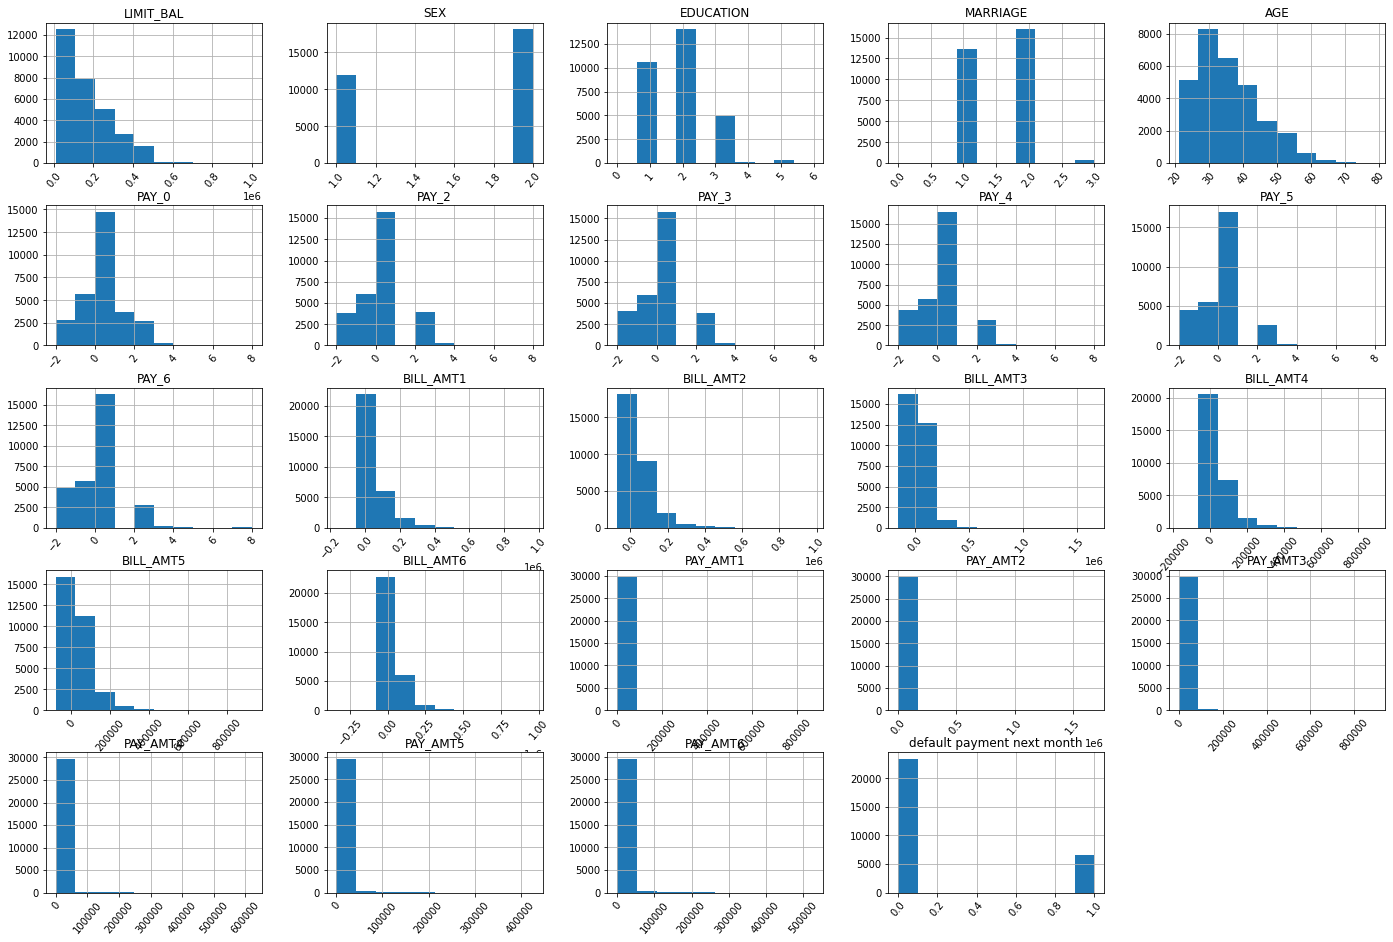

In [29]:
# 2a. plot histograms of numeric columns
df.hist(figsize=(24, 16), xrot=50)
plt.show()

In [30]:
# Some of the columns ranging from -1 to 9 nearly appear as half-Cauchy distributions (but starting at -1 instead of 0). 
# 
# I wonder what effect the encoding of a 'duly payment' as -1 rather than 0 might have on potential models.

# Call df describe 
df.describe()


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


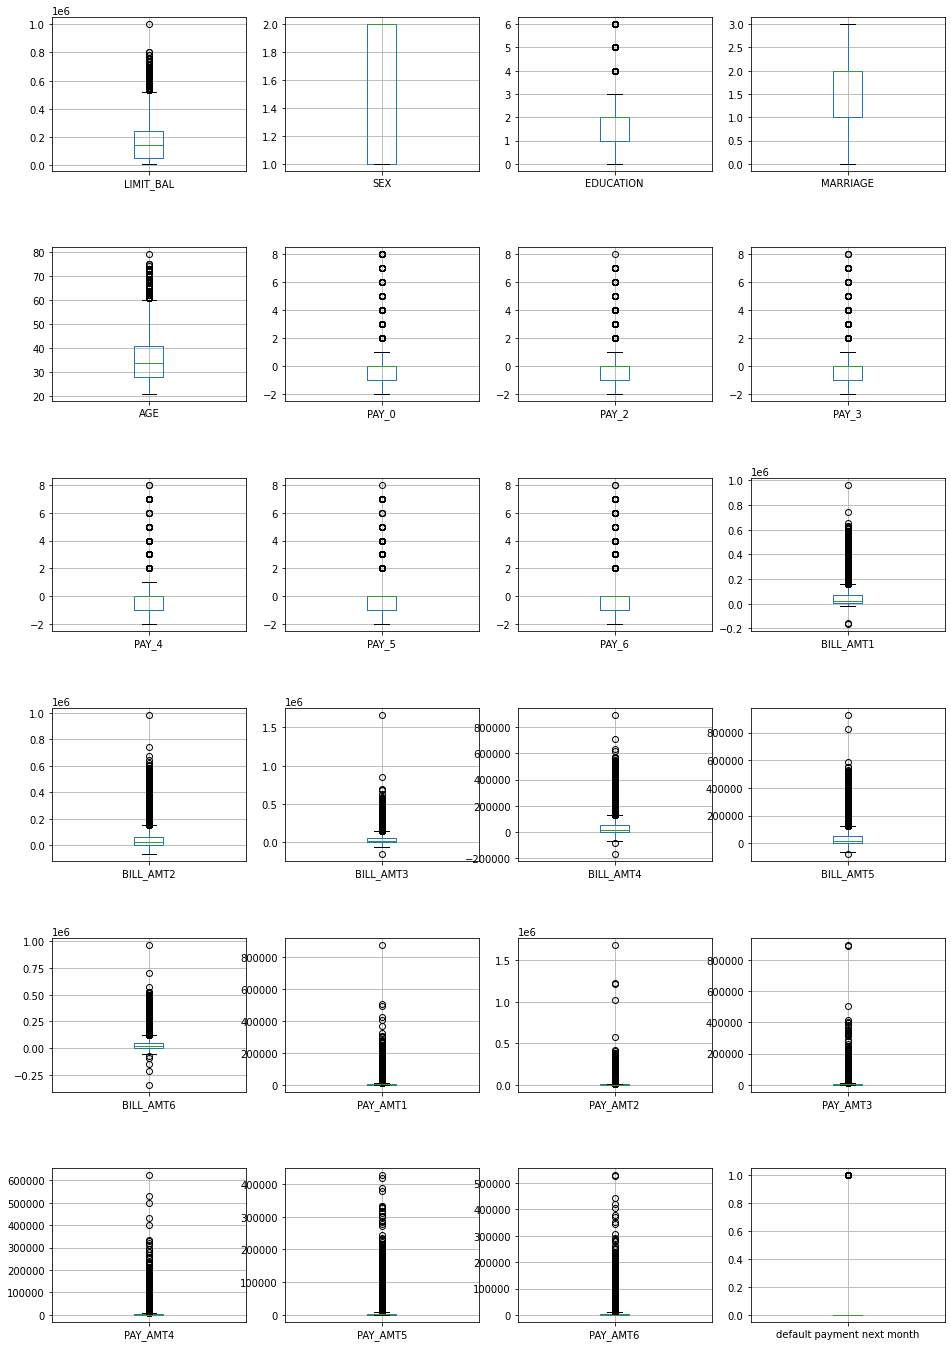

In [31]:
# 2b. draw boxplots to get a better idea on the distribution and number of outliers.

fig, axs = plt.subplots(nrows=6, ncols=4, figsize=(16, 24))
plt.subplots_adjust(hspace=0.5)

for column, ax in zip(df, axs.ravel()):
    df.boxplot([column], ax=ax)
    ax.set_xlabel("")

plt.show()

In [32]:
# check on our dependent variable
df['default payment next month'].value_counts()

0    23364
1     6636
Name: default payment next month, dtype: int64

In [33]:
# see what accuracy a null model that only guessed zero could acheive
print(df['default payment next month'].value_counts()[0]/sum(df['default payment next month'].value_counts()), '%')

0.7788 %


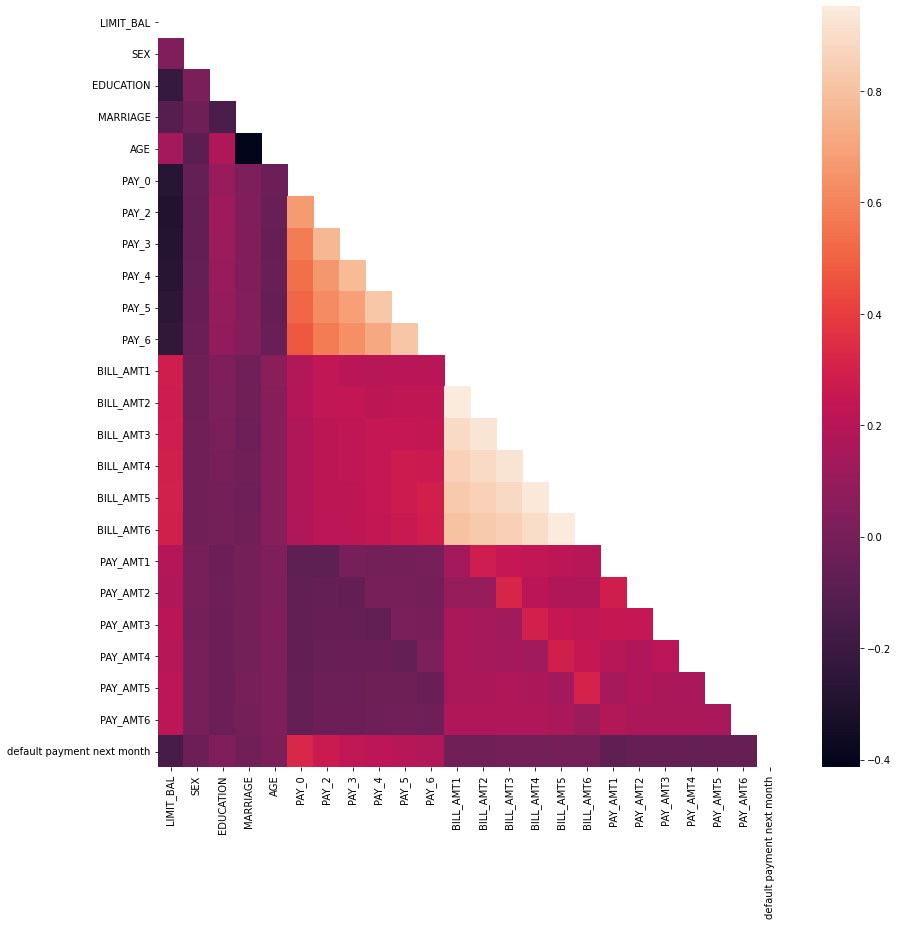

In [34]:
# dataset is also imbalanced. Initial thoughts are to use the AUC-PR metric rather than AUC to ensure false negative rate remains high.
# in the case of a potential default, it is likely more important to have more false positives than false negatives.
# another option would be to over/undersample but this may bias the data due to duplicated samples.

# draw correlation map
fig, ax = plt.subplots(figsize=(14,14))

corr =  df.corr(method='pearson')

trimask_u = np.triu(np.ones_like(corr, dtype=bool))
trimask_l = np.tril(np.ones_like(corr, dtype=bool))

hmap=sns.heatmap(corr, mask = trimask_u, cmap="rocket")

What does the correlation matrix tell us?

1. Our target outcome of default payment next month is negatively correlated with limit_bal (limit balance), bill_amt and pay_amt.
2. While being positively correlated with PAY status where higher values represent how many months late their payment is in that given month (PAY_0 = status in September 2005, PAY_6 = status in April, 2005)
3. Bill amounts are positively correlated with one another (same for PAY statuses).
4. Limit balance is negatively correlated with PAY status.
5. In general, highly collinear features within each of the three subcategories may cause issues with coefficient interpretation. Might consider running a LASSO logistic model.
6. Or a boosted tree which is unlikely to re-use features within these subcategories if most of the variance can be explained by only one or two examples.

In a more intuitive sense, 
1. the greater number of months for delayed payments
2. lower bill statements
3. lower payment amounts 
4. lower credit limit

result in higher rates of defaults.

### Attribute Information from Repo

This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:

X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.

X2: Gender (1 = male; 2 = female).

X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).

X4: Marital status (1 = married; 2 = single; 3 = others).

X5: Age (year).

X6 - X11: History of past payment.

 We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.

X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.

X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

In [35]:
# view all columns

df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [36]:
# refer back to the data attributes and capture all the categorical columns

cats = ['SEX','EDUCATION', 'MARRIAGE',
        'PAY_0', 'PAY_2',
        'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
        'default payment next month']

#take the dependent variables which require encoding for ideal modeling.

cats2 = cats[0:3]

df['SEX_ENCODE'] = np.where(df['SEX']==1, 'male',
                   np.where(df['SEX']==2, 'female',
                   'other'))

df['EDU_ENCODE'] = np.where(df['EDUCATION']==1, 'grad_school',
                   np.where(df['EDUCATION']==2, 'university',
                   np.where(df['EDUCATION']==3, 'high_school',
                   np.where(df['EDUCATION']==4, 'other',
                   'other'))))

df['MARRIAGE_ENCODE'] = np.where(df['MARRIAGE']==1, 'married',
                   np.where(df['MARRIAGE']==2, 'single',
                   np.where(df['MARRIAGE']==3, 'other',
                   'other')))

df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,SEX_ENCODE,EDU_ENCODE,MARRIAGE_ENCODE
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1,female,university,married
2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,female,university,single
3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,female,university,single
4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,female,university,married
5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,male,university,married


# 3. Building the Model

1. For initial analysis I have chosen the simplest model, logistic regression, due to its ease of interpretation. 
2. To start I build a simple logistic regression model with all the variables, followed by a second one with a LASSO/L1 regularization penalty for the coefficients. LASSO penalizes models based on size of the coefficients so the data must be normalized.
3. Given more time, I would compare this with a boosted tree model and use the SHAP value to aid in feature importance and interpretation.

In [37]:
# drop original categorical columns
df2=df.drop(cats2, axis=1)

# create dummy columns for these variables
encodes = ['SEX_ENCODE',	'EDU_ENCODE',	'MARRIAGE_ENCODE']
df2 = pd.get_dummies(df2, columns=encodes)

#scale dataset
scaler = MinMaxScaler()
df2.loc[:, df2.columns != 'default payment next month'] = scaler.fit_transform(df2.loc[:, df2.columns != 'default payment next month'])

df2.head()

In [40]:
# create train and test split
X = df2.drop('default payment next month', axis=1)
y = df2['default payment next month']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
# get accuracy from default logistic regression

log_model = linear_model.LogisticRegression(max_iter = 1000)
y_pred = log_model.fit(X_train, y_train).predict(X_test)
accuracy_score(y_test, y_pred)

0.8101666666666667

In [42]:
res = "\n".join("{} {}".format(x, y) for x, y in zip(X.columns, log_model.coef_))
#print(res)

pd.DataFrame(log_model.coef_, columns = X.columns)

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,SEX_ENCODE_female,SEX_ENCODE_male,EDU_ENCODE_grad_school,EDU_ENCODE_high_school,EDU_ENCODE_other,EDU_ENCODE_university,MARRIAGE_ENCODE_married,MARRIAGE_ENCODE_other,MARRIAGE_ENCODE_single
0,-0.94712,0.40363,5.681926,0.968506,0.748183,0.366558,0.216858,0.150259,-1.770118,-0.246394,-0.483295,-0.397126,0.084331,0.392998,-2.394925,-1.92111,-1.038459,-1.450869,-0.801628,-1.357816,-0.059658,0.053364,0.312105,0.199065,-0.765033,0.247569,0.140165,-0.105942,-0.040517


In [43]:
# train logistic regression models including L1 regularization
# code inspired by documentation here: https://scikit-learn.org/stable/auto_examples/linear_model/plot_logistic_path.html

cs = l1_min_c(X_train, y_train, loss="log") * np.logspace(0, 7, 16)

lasso_log = linear_model.LogisticRegression(
    penalty="l1",
    solver="liblinear",
    tol=1e-6,
    max_iter=int(1e6),
    warm_start=True,
    intercept_scaling=10000.0,
)

coefs = []
scores = []
confusions = []

for c in cs:
    lasso_log.set_params(C=c)
    lasso_log.fit(X_train, y_train)

    y_pred = lasso_log.predict(X_test)

    coefs.append(lasso_log.coef_.ravel().copy())
    scores.append(accuracy_score(y_test, y_pred))
    confusions.append(confusion_matrix(y_test, y_pred))

coefs = np.array(coefs)

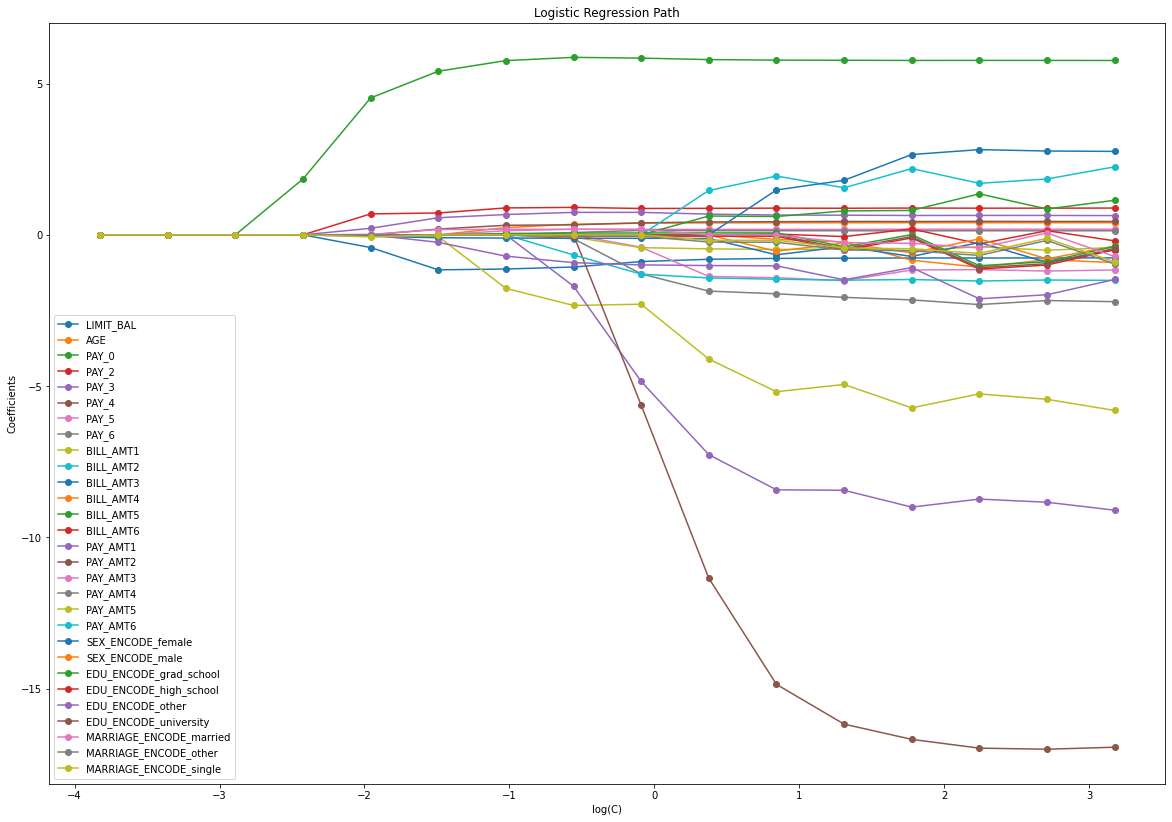

In [50]:
plt.figure(figsize=(20, 14))
plt.plot(np.log10(cs), coefs, marker="o")
ymin, ymax = plt.ylim()
plt.xlabel("log(C)")
plt.ylabel("Coefficients")
plt.title("Logistic Regression Path")
plt.axis("tight")
plt.legend(X.columns)
plt.show()

In [45]:
for (i, item) in enumerate(scores, start=0):
    print(i, item)

0 0.7811666666666667
1 0.7811666666666667
2 0.7811666666666667
3 0.7813333333333333
4 0.7848333333333334
5 0.8026666666666666
6 0.809
7 0.8106666666666666
8 0.8106666666666666
9 0.8111666666666667
10 0.8108333333333333
11 0.811
12 0.8108333333333333
13 0.8106666666666666
14 0.8106666666666666
15 0.8106666666666666


It appears that the models with the greatest accuracy on the test set lies somewhere in the middle of our regularization values. That makes this decision easier.

The argument could be made to stop at the 5th or 6th model as well since there were minimal gains in accuracy from that point on.

Due to the imbalanced dataset, accuracy of 78.1% was possible with just a model intercept. i.e. predictions that can be made knowing nothing else about the available input data.

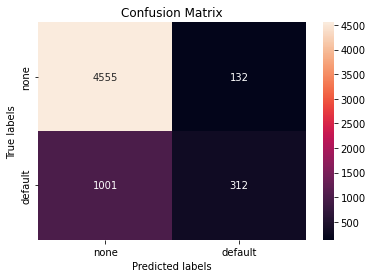

In [48]:
# let's take a look at the confusion matrix for model #9

ax= plt.subplot()
sns.heatmap(confusions[9], annot=True, fmt='g', ax=ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['none', 'default']); ax.yaxis.set_ticklabels(['none', 'default']);

In [49]:
# let's take another look at how coefficient values changed with the regularization parameter.

coef_df = pd.DataFrame(coefs, columns = X.columns)

coef_df

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,SEX_ENCODE_female,SEX_ENCODE_male,EDU_ENCODE_grad_school,EDU_ENCODE_high_school,EDU_ENCODE_other,EDU_ENCODE_university,MARRIAGE_ENCODE_married,MARRIAGE_ENCODE_other,MARRIAGE_ENCODE_single
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,1.845530,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,-0.418602,0.000000,4.525265,0.693296,0.216981,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.048492,0.000000,0.000000,0.000000,0.000000,0.000000,0.017111,0.000000,-0.067533
5,-1.156085,0.000000,5.408507,0.722947,0.566516,0.191100,0.000000,0.000000,-0.054285,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.095177,0.000000,0.000000,0.000000,-0.246790,0.000000,0.175666,0.000000,0.000000
6,-1.128516,0.240299,5.760016,0.890489,0.672398,0.316279,0.137264,0.009670,-1.767502,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.106664,0.000000,0.046472,-0.008097,-0.703909,0.000000,0.184122,0.000000,0.000000
7,-1.063800,0.351848,5.867529,0.907892,0.742946,0.331553,0.184986,0.078147,-2.333483,0.000000,0.000000,0.000000,0.000000,0.000000,-1.695759,0.000000,0.000000,-0.128915,-0.076247,-0.664358,-0.110440,0.000000,0.058827,-0.036716,-0.918542,0.000000,0.184481,0.000000,0.000000
8,-0.881658,0.387697,5.842056,0.872304,0.743413,0.396471,0.180642,0.146532,-2.291575,0.000000,0.000000,0.000000,0.000000,0.000000,-4.843497,-5.626405,-0.409045,-1.289558,-0.422347,-1.298824,-0.113778,0.000000,0.063344,-0.043237,-0.993430,0.000000,0.181118,-0.042099,0.000000
9,-0.807281,0.395380,5.793986,0.877308,0.685504,0.427389,0.181039,0.137594,-4.104272,1.466631,0.000000,0.000000,0.622450,0.000000,-7.264277,-11.347115,-1.373595,-1.858622,-0.462782,-1.424002,-0.120098,-0.002667,0.064275,-0.044296,-1.014694,0.000000,0.000000,-0.238707,-0.179358


# 4. Model Results

1. This initial logistic regression doesn't seem to have actually learned much from the data, shown by it's minimal increases in accuracy with additional features compared to the null model. 
2. The model also has a very large false negative rate as shown by the above confusion matrix; this means it guessed over 1,000 people did NOT default when they actually did.
3. Due to the imbalanced dataset, the decision threshold could be tweaked to lower this rate, or by over/undersampling our dataset.
4. Fit more complex models such as boosted trees since logistic regression is not cutting it.

# 5. Next Steps and Further Research

1. Convert month-based columns to a datetime format and conduct time-series analysis (ex: checking for seasonality, trend and homogeneity of variables over time). Unfortunately we only have six months of data which isn't enough to capture a one year cycle.
2. Fit a boosted-tree such as CatBoost or XGBoost and use the SHAP package to observe which features and values contributed most to any given loan prediction.
3. Investigate other factors leading to lower credit limits.
4. Try normalizing bill and payment amounts by dividing them by that customer's initial limit to explicitly relate the two features (making it easier for the model to pick up on). e.g. a payment amount of 8,000 when the limit is 10,000 would be expressed as 0.8. 
5. Observe how model accuracy drops after dropping more recent months one-by-one to see how accurately a default can be predicted more ahead of time.
6. Create plot of Theil's U (uncertainty coefficients) to see how much knowing one value of a categorical feature can tell us about another categorical feature. This would inform us to what features of importance might be chosen in a tree-based model.
7. Investigate the effect of having paid on time represented as 0 rather than -1 for the PAY_0, PAY_2, PAY_3, PAY_4, PAY_5, PAY_6 columns.
8. One-hot encode the marriage status and education level columns. Although there are very few 'other' classifications for both of these, it may aid the model in fitting these factors when their classifications are not on the same scale. 